In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import re
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./data/complaints_preprocessed.csv').dropna()

In [21]:
data[data['Issue_Code'] == 4]

,Consumer complaint narrative,Issue,Issue_Code
40,co villag capit nevada request review basi loa...,Struggling to pay mortgage,4
60,contact select portfolio servic friday discuss...,Struggling to pay mortgage,4
72,home foreclos around well fargo sold almost im...,Struggling to pay mortgage,4
94,us bank na truste banc america fc sent notic i...,Struggling to pay mortgage,4
126,tri get loan modif continu deni answer time si...,Struggling to pay mortgage,4
...,...,...,...
353387,appli loan modif tri lower month amount strugg...,Struggling to pay mortgage,4
353388,purchas first home togeth time year old offer ...,Struggling to pay mortgage,4
353389,appli modif due financi hardship experienc she...,Struggling to pay mortgage,4
353425,honor duti serv countri past year serv includ ...,Struggling to pay mortgage,4


In [3]:
X = data['Consumer complaint narrative']
y = data['Issue_Code']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 321, stratify = y)

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

# Create CountVectorizer object
vectorizer = CountVectorizer()

In [5]:
# Generate matrix of word vectors
bow_matrix = vectorizer.fit_transform(X_train)

In [6]:
#Fill in the code to fit and transform a CountVectorizer (using all defaults) on the text column of X_train and X_test

vect =  CountVectorizer()

#fit the vectorizer to the "text" column of the training data
vect.fit(X_train)

X_train_vec = vect.transform(X_train)

X_test_vec = vect.transform(X_test)

In [7]:
from sklearn.naive_bayes import MultinomialNB

In [8]:
nb = MultinomialNB().fit(X_train_vec, y_train)

y_pred = nb.predict(X_test_vec)

In [11]:
cf_matrix = confusion_matrix(y_test, y_pred)

<Axes: >

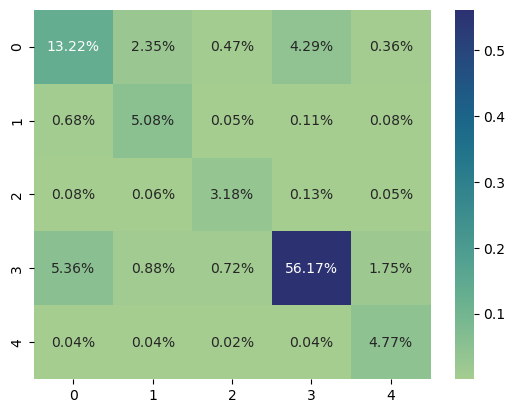

In [16]:
import seaborn as sns
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True, fmt='.2%', cmap='crest')

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.64      0.66     18289
           1       0.60      0.85      0.70      5311
           2       0.72      0.91      0.80      3087
           3       0.92      0.87      0.89     57323
           4       0.68      0.97      0.80      4343

    accuracy                           0.82     88353
   macro avg       0.72      0.85      0.77     88353
weighted avg       0.84      0.82      0.83     88353



In [13]:
accuracy_score(y_test, y_pred)

0.8242617681346417